In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.shape

(8950, 18)

In [9]:
df.CUST_ID.nunique()

8950

## Preprocessing

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median(), inplace=True)
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(), inplace=True)

In [14]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Feature creation

### Exercise 1

In [15]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [22]:
df['MONTHLY_AVG_PURCHASE'] = df.eval('PURCHASES / TENURE')
df['MONTHLY_AVG_CASH_ADVANCE'] = df.eval('CASH_ADVANCE / TENURE')

### Exercise 2

In [9]:
df.query('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES > 0').shape

(2774, 20)

In [10]:
df.query('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES <= 0').shape

(1874, 20)

In [11]:
df.query('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES > 0').shape

(2260, 20)

In [12]:
df.query('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES <= 0').shape

(2042, 20)

In [19]:
df.loc[df.eval('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES > 0'), 'PURCHASE_TYPE'] = 'BOTH'
df.loc[df.eval('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES <= 0'), 'PURCHASE_TYPE'] = 'ONEOFF'
df.loc[df.eval('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES > 0'), 'PURCHASE_TYPE'] = 'INSTALLMENTS'
df.loc[df.eval('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES <= 0'), 'PURCHASE_TYPE'] = 'NONE'

In [23]:
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,INSTALLMENTS,7.95,0.000000
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NONE,0.00,536.912124


### Exercise 3

In [27]:
df['AVG_AMOUNT_PER_PURCHASE'] = df.eval('PURCHASES / PURCHASES_FREQUENCY')
df['CASH_ADVANDE_PER_PURCHASE'] = df.eval('CASH_ADVANCE / CASH_ADVANCE_FREQUENCY')

In [29]:
df['AVG_AMOUNT_PER_PURCHASE'] = df['AVG_AMOUNT_PER_PURCHASE'].fillna(df['AVG_AMOUNT_PER_PURCHASE'].median())
df['CASH_ADVANDE_PER_PURCHASE'] = df['CASH_ADVANDE_PER_PURCHASE'].fillna(df['CASH_ADVANDE_PER_PURCHASE'].median())

### Exercise 4

In [33]:
df['LIMIT_USAGE'] = df.BALANCE / df.CREDIT_LIMIT

### Exercise 5

In [34]:
df['PAYMENT_TO_MNM_PAYMENT_RATIO'] = df.eval('PAYMENTS / MINIMUM_PAYMENTS')

### Insight

In [36]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_TYPE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,AVG_AMOUNT_PER_PURCHASE,CASH_ADVANDE_PER_PURCHASE,LIMIT_USAGE,PAYMENT_TO_MNM_PAYMENT_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,INSTALLMENTS,7.950000,0.000000,572.398855,5075.312568,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,NONE,0.000000,536.912124,1152.830000,25771.781932,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,627.284787,0.000000,12,ONEOFF,64.430833,0.000000,773.170000,5075.312568,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,312.343947,0.000000,12,ONEOFF,124.916667,17.149001,17988.071952,2469.466082,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,ONEOFF,1.333333,0.000000,192.000768,5075.312568,0.681429,2.771075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,48.886365,0.500000,6,INSTALLMENTS,48.520000,0.000000,291.120000,5075.312568,0.028494,6.660231
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,312.343947,0.000000,6,INSTALLMENTS,50.000000,0.000000,300.000000,5075.312568,0.019183,0.883197
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,82.418369,0.250000,6,INSTALLMENTS,24.066667,0.000000,173.280069,5075.312568,0.023399,0.986076
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,55.755628,0.250000,6,NONE,0.000000,6.093130,1152.830000,219.352229,0.026915,0.942505


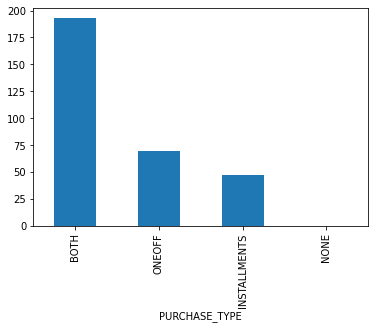

In [42]:
df.groupby('PURCHASE_TYPE').MONTHLY_AVG_PURCHASE.mean().sort_values(ascending=False).plot.bar();

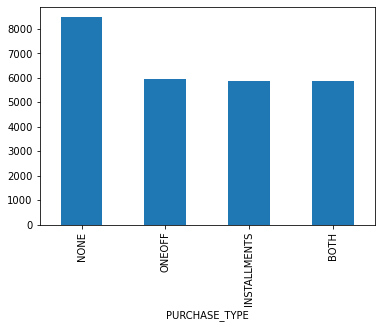

In [43]:
df.groupby('PURCHASE_TYPE').CASH_ADVANDE_PER_PURCHASE.mean().sort_values(ascending=False).plot.bar();

## Clustering

Unsupervised learning:
- Clustering
- Dimensionality reduction

In [46]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PURCHASE_TYPE',
       'MONTHLY_AVG_PURCHASE', 'MONTHLY_AVG_CASH_ADVANCE',
       'AVG_AMOUNT_PER_PURCHASE', 'CASH_ADVANDE_PER_PURCHASE', 'LIMIT_USAGE',
       'PAYMENT_TO_MNM_PAYMENT_RATIO'],
      dtype='object')

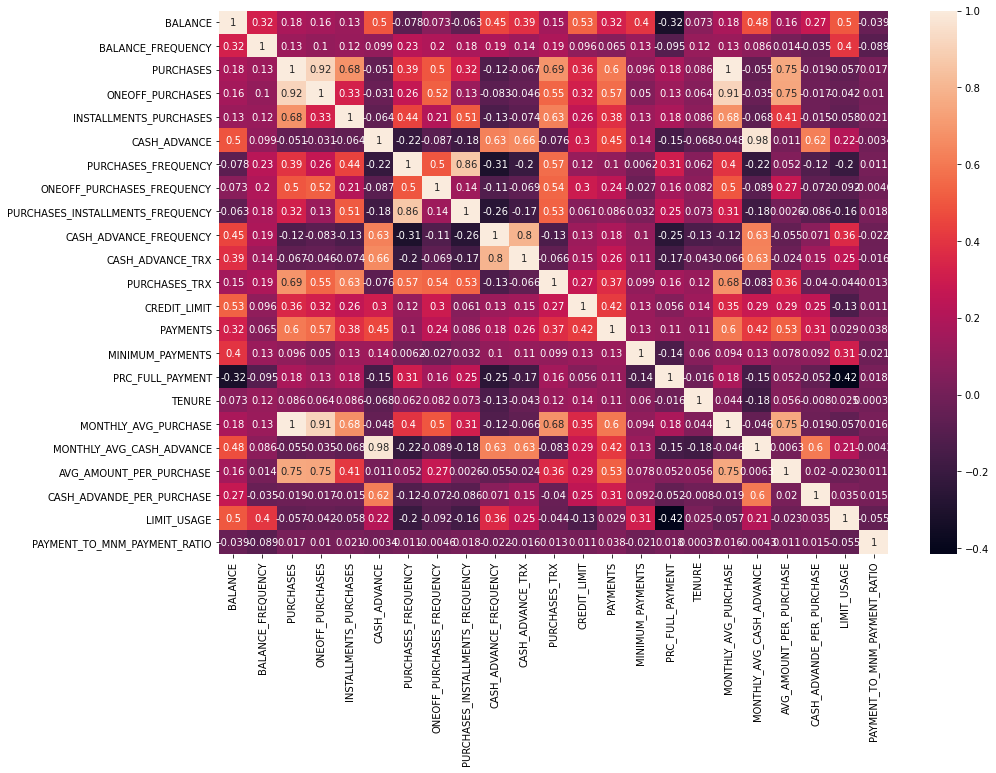

In [48]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(columns='CUST_ID').corr(), annot=True);

In [94]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

- Intra-cluster: Minimum
- Inter-cluster: Maximum
- Find centroid:
+ Tính khoảng cách --> gán cluster --> dịch chuyển cluster (trung bình các điểm trong cùng 1 cluster) --> đo khoảng cách lại --> gán cluster

max - min = 1000000, [0, 1]

StandardScaler = x - mean / std - > [-sqrt(3), sqrt(3)]

MinMaxScaler = x - min / max - min -- > [0 - 1]

One-hot encoding:
- Convert categorical to nummeric: Monday, Tuesday...
- 1, 2, 3, 4:

In [53]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PURCHASE_TYPE',
       'MONTHLY_AVG_PURCHASE', 'MONTHLY_AVG_CASH_ADVANCE',
       'AVG_AMOUNT_PER_PURCHASE', 'CASH_ADVANDE_PER_PURCHASE', 'LIMIT_USAGE',
       'PAYMENT_TO_MNM_PAYMENT_RATIO'],
      dtype='object')

In [78]:
pipeline = Pipeline([('scalar', MinMaxScaler()), 
                     ('reduction', PCA(n_components=5)), 
                     ('kmean', KMeans(n_clusters=4))])
cluster = pipeline.fit(df.drop(columns=['CUST_ID', 'PURCHASE_TYPE']))

In [79]:
pca = cluster.get_params().get('reduction')
kmean = cluster.get_params().get('kmean')

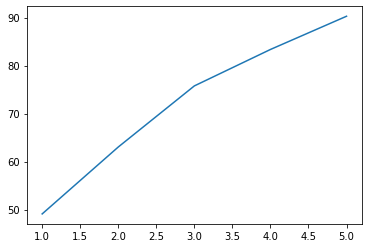

In [80]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_ * 100));

In [81]:
kmean.labels_

array([0, 0, 2, ..., 1, 0, 2], dtype=int32)

In [82]:
X = pca.transform(df.drop(columns=['CUST_ID', 'PURCHASE_TYPE']))

In [84]:
df_new = pd.DataFrame(X, columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])
df_new['CLUSTER'] = kmean.labels_
df_new

,PC_1,PC_2,PC_3,PC_4,PC_5,CLUSTER
0,1.162663,169.357784,-37.106371,-103.095818,-23.858314,0
1,-101.735424,1571.137958,-871.115931,-865.181083,-876.957307,0
2,201.670246,1380.040386,-455.429382,-673.501300,-263.537748,2
3,331.025578,1797.249372,-161.347215,-618.890835,-5.929097,0
4,-5.595699,281.981766,-165.561829,-168.856401,-111.906134,0
...,...,...,...,...,...,...
8945,17.872772,176.438821,-32.034089,-101.790739,-26.788517,1
8946,17.996883,175.067760,-37.013567,-102.459986,-27.094989,1
8947,2.880792,154.105308,-35.962201,-93.687204,-26.792142,1
8948,17.138535,100.932947,0.315757,-42.071912,6.898192,0


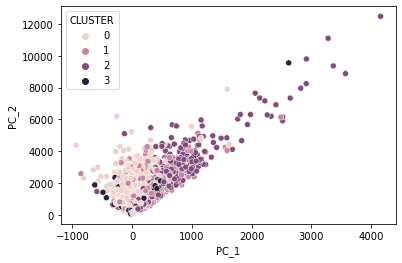

In [85]:
sns.scatterplot(x='PC_1', y='PC_2', data=df_new, hue='CLUSTER');

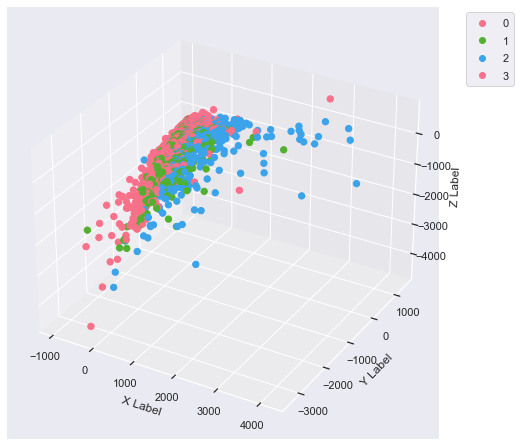

In [93]:
import re
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = df_new.PC_1
y = df_new.PC_3
z = df_new.PC_5

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=df_new.CLUSTER, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### TSNE

In [104]:
scaler = MinMaxScaler().fit_transform(df.drop(columns=['CUST_ID', 'PURCHASE_TYPE']))
tsne = TSNE(n_components=3).fit_transform(scaler)
cluster = KMeans(n_clusters=4).fit(tsne)

In [105]:
df_new = pd.DataFrame(tsne, columns=['PC_1', 'PC_2', 'PC_3'])
df_new['CLUSTER'] = kmean.labels_
df_new

,PC_1,PC_2,PC_3,CLUSTER
0,-9.717534,-2.317103,-1.019340,0
1,-10.630363,2.596555,12.677594,0
2,15.542547,3.495156,9.402534,2
3,-10.843220,-8.737278,3.138187,0
4,-16.435392,12.481880,-3.332634,0
...,...,...,...,...
8945,8.289363,-18.599617,-2.868738,1
8946,10.088155,-16.408323,-0.238229,1
8947,7.550232,-16.996653,-1.209802,1
8948,3.781862,-15.948335,12.450587,0


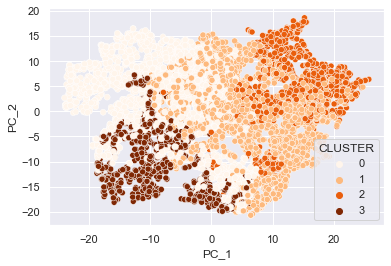

In [109]:
sns.scatterplot(x='PC_1', y='PC_2', hue='CLUSTER', data=df_new, palette='Oranges');

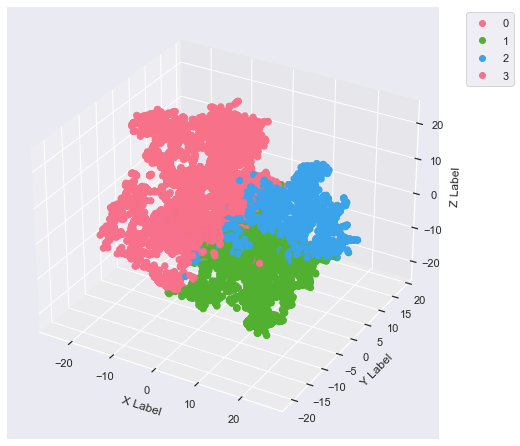

In [106]:
import re
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = df_new.PC_1
y = df_new.PC_2
z = df_new.PC_3

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=df_new.CLUSTER, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()